In [55]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [56]:
df_train = pd.read_csv("diabetes_preprocessed.csv")

In [57]:
from sklearn import preprocessing

In [58]:
df_train.head()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome
0,0.627,50,148.0,72.0,33.6,6,1
1,0.351,31,85.0,66.0,26.6,1,0
2,0.672,32,183.0,64.0,23.3,8,1
3,0.167,21,89.0,66.0,28.1,1,0
4,0.201,30,116.0,74.0,25.6,5,0


In [59]:
min_max_scaler = preprocessing.MinMaxScaler()
for k in df_train.columns:
    df_train[k] = min_max_scaler.fit_transform(df_train[k].values.astype(float))

c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError

In [60]:
df_train.head()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome
0,0.234415,0.591837,0.670968,0.533333,0.314928,0.352941,1.0
1,0.116567,0.204082,0.264516,0.466667,0.171779,0.058824,0.0
2,0.253629,0.224490,0.896774,0.444444,0.104294,0.470588,1.0
3,0.038002,0.000000,0.290323,0.466667,0.202454,0.058824,0.0
4,0.052519,0.183673,0.464516,0.555556,0.151329,0.294118,0.0


In [61]:
# Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data

array([[ 0.23441503,  0.59183673,  0.67096774, ...,  0.31492843,
         0.35294118,  1.        ],
       [ 0.11656704,  0.20408163,  0.26451613, ...,  0.17177914,
         0.05882353,  0.        ],
       [ 0.25362938,  0.2244898 ,  0.89677419, ...,  0.10429448,
         0.47058824,  1.        ],
       ..., 
       [ 0.07130658,  0.18367347,  0.49677419, ...,  0.16359918,
         0.29411765,  0.        ],
       [ 0.11571307,  0.53061224,  0.52903226, ...,  0.24335378,
         0.05882353,  1.        ],
       [ 0.10119556,  0.04081633,  0.31612903, ...,  0.24948875,
         0.05882353,  0.        ]])

In [62]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [63]:
kmeans = KMeans(n_clusters = 3)

In [64]:
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
df_train.columns

Index(['DiabetesPedigreeFunction', 'Age', 'GlucoseFill', 'BloodPressureFill',
       'BMIFill', 'Pregnancies', 'Outcome'],
      dtype='object')

In [66]:
kmeans.cluster_centers_[0]

array([  1.26594309e-01,   3.86603028e-01,   4.38501561e-01,
         5.67652330e-01,   2.68652286e-01,   3.52941176e-01,
        -6.10622664e-16])

In [67]:
# dtype = [('DiabetesPedigreeFunction','float32'), ('Age','float32'), ('GlucoseFill','float32'), ('BloodPressureFill','float32'), ('BMIFill','float32'), ('Pregnancies','float32'), ('Outcome','int32')]
# values = kmeans.cluster_centers_
# index = [i for i in range(0, len(values))]
dfp =pd.DataFrame({'DiabetesPedigreeFunction':kmeans.cluster_centers_[:,0],'Age':kmeans.cluster_centers_[:,1],'GlucoseFill':kmeans.cluster_centers_[:,2],'BloodPressureFill':kmeans.cluster_centers_[:,3],'BMIFill':kmeans.cluster_centers_[:,4],'Pregnancies':kmeans.cluster_centers_[:,5],'Outcome':kmeans.cluster_centers_[:,6]})

In [68]:
dfp['Outcome'] = dfp['Outcome']

In [69]:
df_train.mean()

DiabetesPedigreeFunction    0.156078
Age                         0.224665
GlucoseFill                 0.497913
BloodPressureFill           0.533397
BMIFill                     0.291404
Pregnancies                 0.219259
Outcome                     0.381636
dtype: float64

In [70]:
dfp.to_csv('ss.csv')

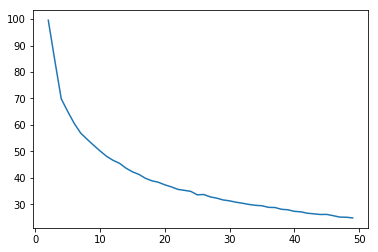

In [71]:
# kmeans
sse_list = list()
max_k = 50
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.xlabel="K"
plt.ylabel="sse"
plt.show()

In [82]:
kmeans = KMeans(init='k-means++', n_clusters=11, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(train_data, kmeans.labels_))

centers [[  1.71272934e-01   7.05009276e-01   7.25122190e-01   6.07407407e-01
    2.93239140e-01   2.37076649e-01   1.00000000e+00]
 [  1.24048303e-01   5.28887611e-02   3.47160382e-01   4.27230047e-01
    1.57349002e-01   1.02734051e-01  -6.66133815e-16]
 [  1.98427404e-01   3.68502118e-01   4.49056604e-01   5.46436059e-01
    3.02697071e-01   4.49500555e-01   1.00000000e+00]
 [  1.57583785e-01   2.02415660e-01   8.21329822e-01   5.21768707e-01
    3.30620592e-01   1.69267707e-01   1.00000000e+00]
 [  1.51873992e-01   7.52834467e-02   3.74910394e-01   5.08518519e-01
    3.84139968e-01   7.32026144e-02  -4.44089210e-16]
 [  1.20721934e-01   2.76818420e-01   3.42928040e-01   5.35327635e-01
    2.58586335e-01   3.50678733e-01  -3.33066907e-16]
 [  1.32722773e-01   5.17284465e-01   5.26662278e-01   5.94104308e-01
    2.63344602e-01   3.69747899e-01   1.11022302e-16]
 [  1.19941408e-01   1.08843537e-01   5.88440860e-01   5.83950617e-01
    2.79481936e-01   1.32352941e-01  -2.77555756e-16]


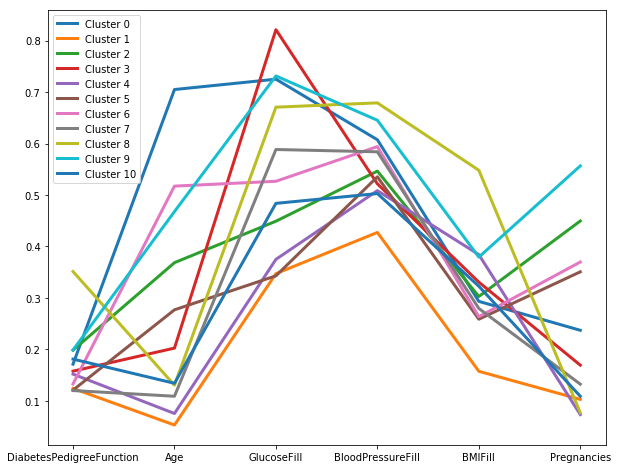

In [84]:
fig = plt.figure(figsize=(10, 8)) 
for i in range(0, 11):
    plt.plot(range(0, 6), kmeans.cluster_centers_[i][:-1], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 6), list(df_train.columns)[:-1])
plt.legend()

In [85]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

In [86]:
df_clusters

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome,Labels
0,0.234415,0.591837,0.670968,0.533333,0.314928,0.352941,1.0,0
1,0.116567,0.204082,0.264516,0.466667,0.171779,0.058824,0.0,1
2,0.253629,0.224490,0.896774,0.444444,0.104294,0.470588,1.0,3
3,0.038002,0.000000,0.290323,0.466667,0.202454,0.058824,0.0,1
4,0.052519,0.183673,0.464516,0.555556,0.151329,0.294118,0.0,5
5,0.072588,0.102041,0.219355,0.288889,0.261759,0.176471,1.0,10
6,0.023911,0.163265,0.458065,0.511111,0.349693,0.588235,0.0,5
7,0.034159,0.653061,0.987097,0.511111,0.251534,0.117647,1.0,0
8,0.065756,0.673469,0.522581,0.800000,0.329243,0.470588,1.0,9
9,0.048249,0.183673,0.425806,0.755556,0.396728,0.235294,0.0,7


In [87]:
df_cluster0 = df_clusters[df_clusters['Labels']==0]
df_cluster1 = df_clusters[df_clusters['Labels']==1]
df_cluster2 = df_clusters[df_clusters['Labels']==2]
df_cluster3 = df_clusters[df_clusters['Labels']==3]
df_cluster4 = df_clusters[df_clusters['Labels']==4]
df_cluster5 = df_clusters[df_clusters['Labels']==5]
df_cluster6 = df_clusters[df_clusters['Labels']==6]
df_cluster7 = df_clusters[df_clusters['Labels']==7]
df_cluster8 = df_clusters[df_clusters['Labels']==8]
df_cluster9 = df_clusters[df_clusters['Labels']==9]
df_cluster10 = df_clusters[df_clusters['Labels']==10]

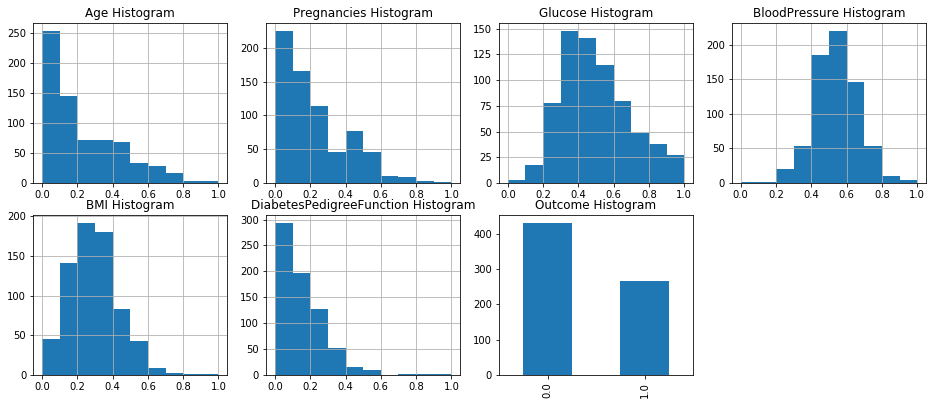

In [88]:
#All data
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (3, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_train['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_train['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_train['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

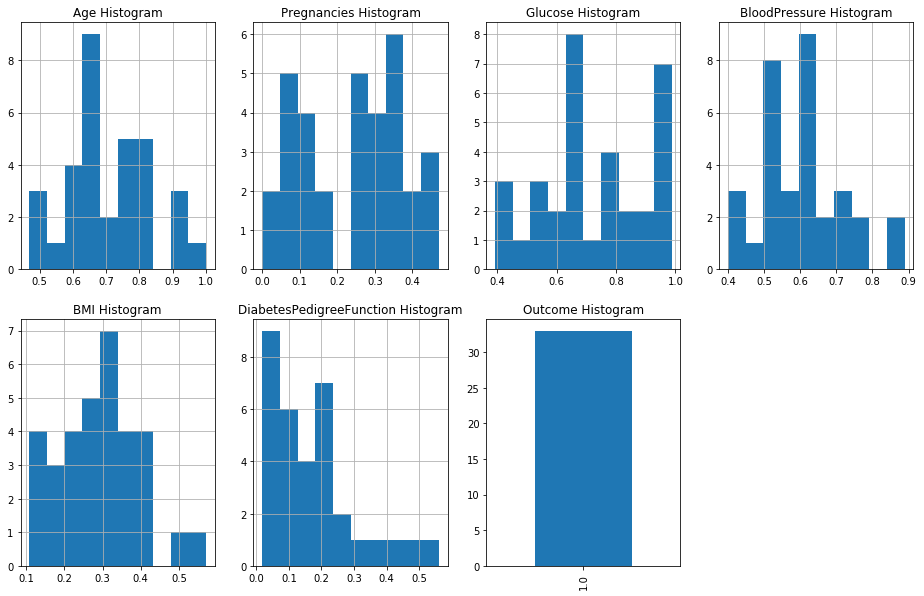

In [89]:
#Cluster0
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster0['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster0['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster0['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster0['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster0['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster0['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster0['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

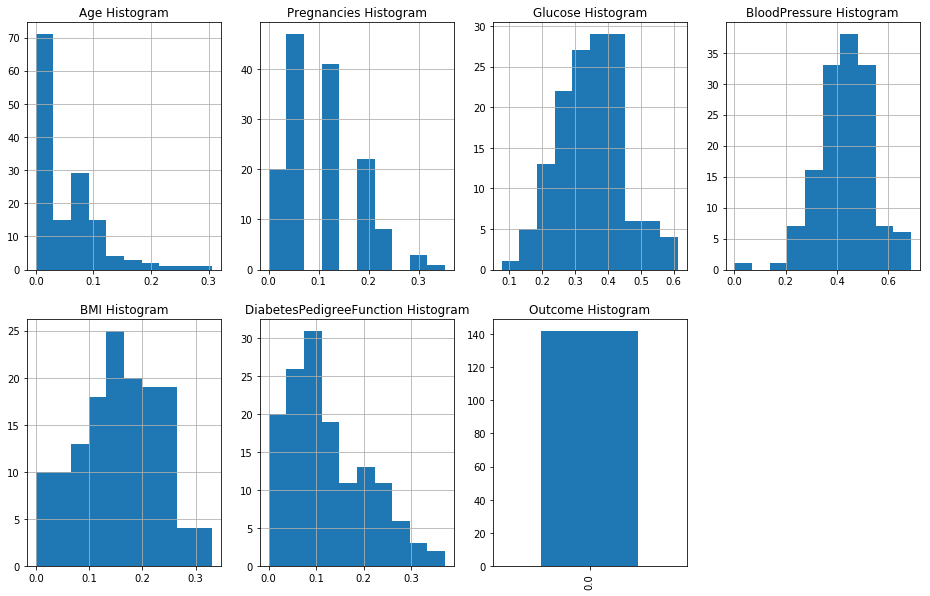

In [90]:
#Cluster1
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster1['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster1['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster1['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster1['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster1['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster1['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster1['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

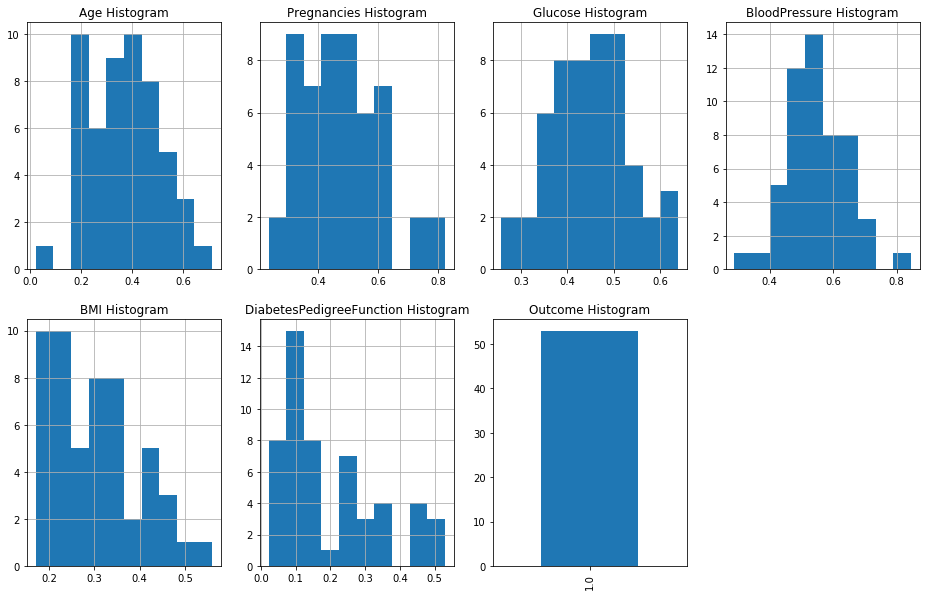

In [91]:
#Cluster2
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster2['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster2['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster2['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster2['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster2['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster2['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster2['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

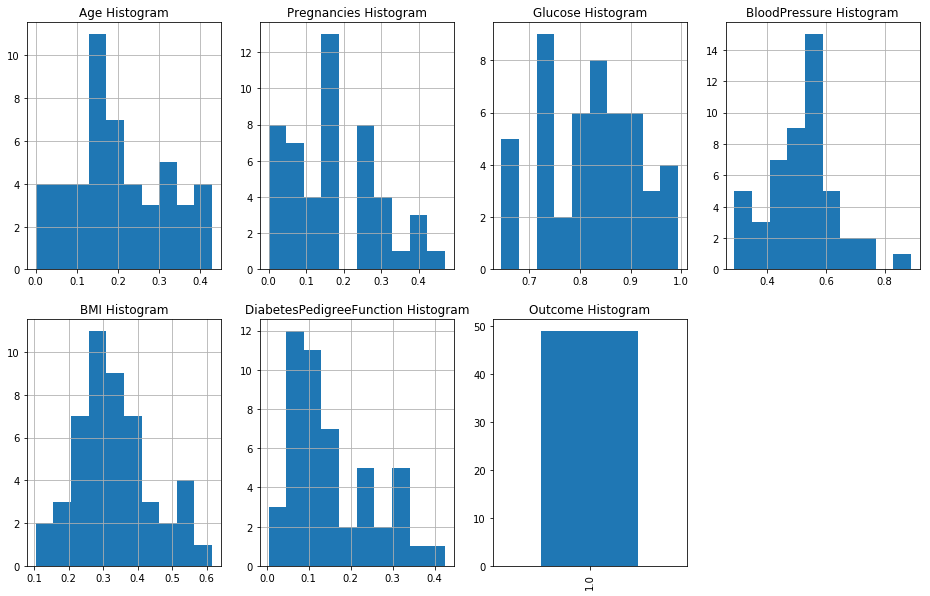

In [92]:
#Cluster3
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster3['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster3['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster3['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster3['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster3['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster3['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster3['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

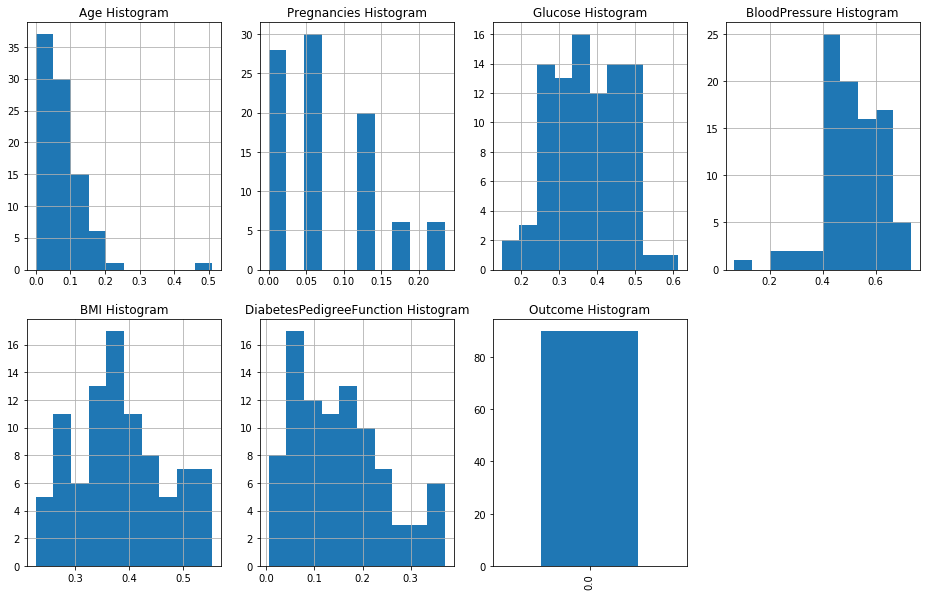

In [93]:
#Cluster4
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster4['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster4['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster4['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster4['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster4['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster4['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster4['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

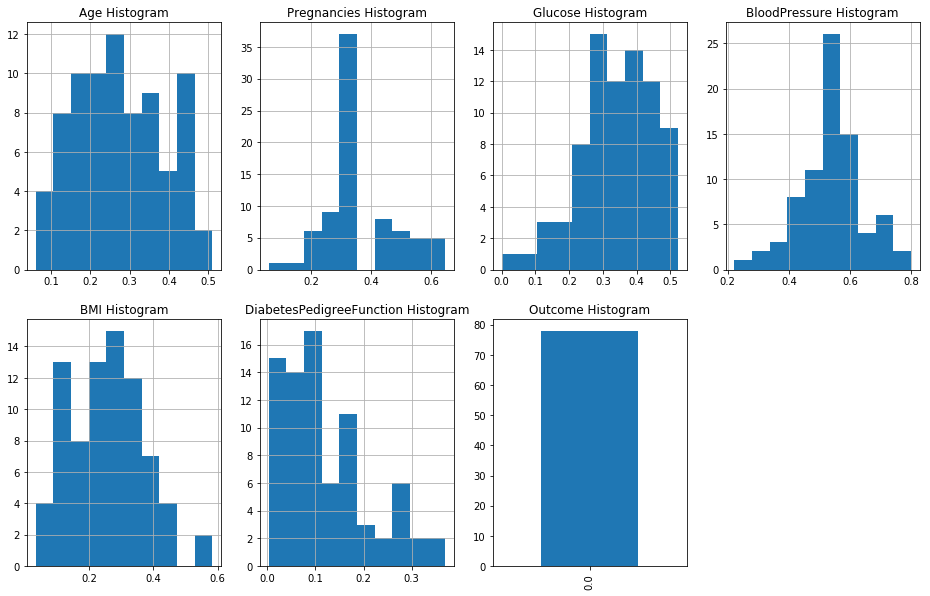

In [94]:
#Cluster5
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster5['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster5['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster5['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster5['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster5['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster5['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster5['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

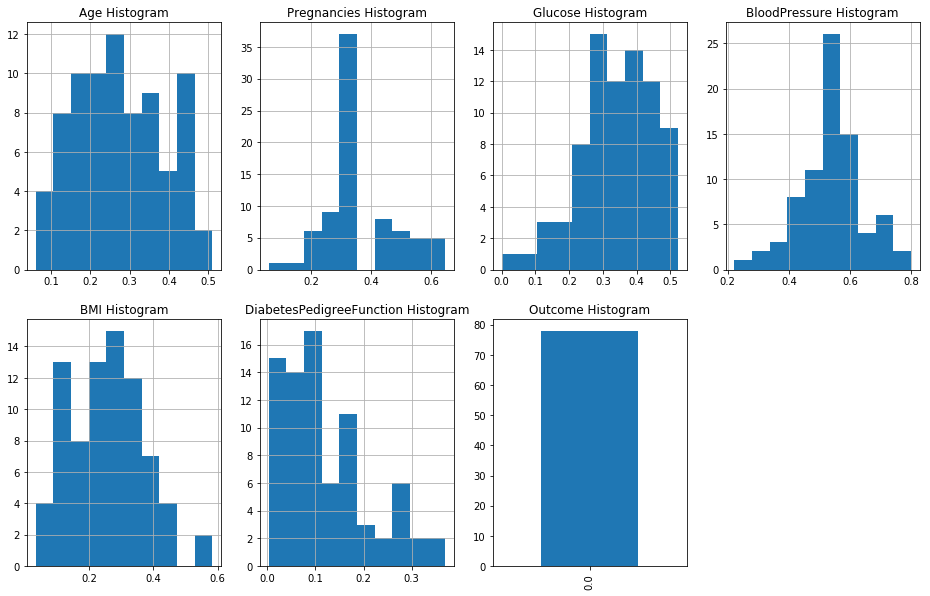

In [95]:
#Cluster5
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster5['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster5['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster5['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster5['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster5['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster5['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster5['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

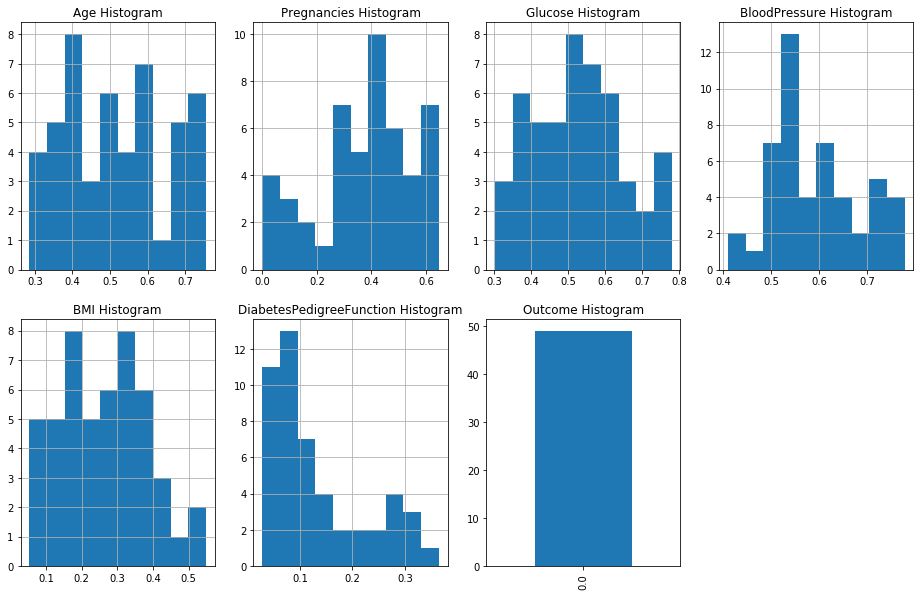

In [96]:
#Cluster6
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster6['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster6['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster6['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster6['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster6['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster6['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster6['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

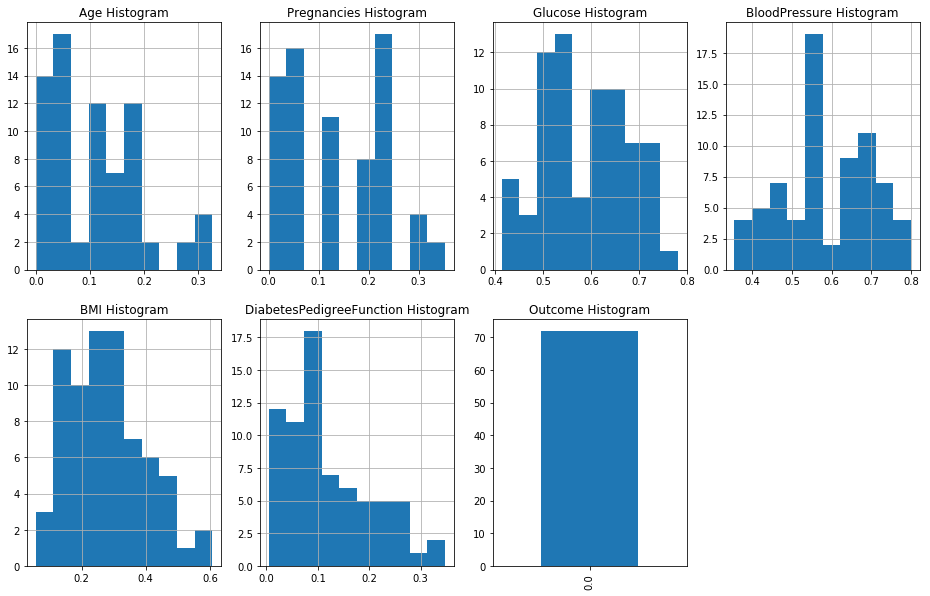

In [97]:
#Cluster7
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster7['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster7['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster7['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster7['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster7['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster7['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster7['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

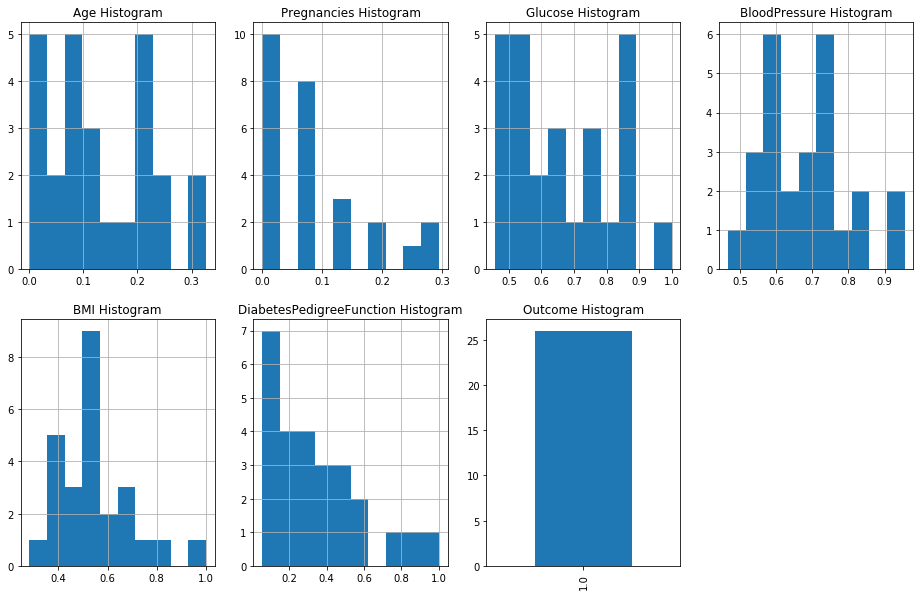

In [98]:
#Cluster8
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster8['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster8['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster8['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster8['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster8['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster8['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster8['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

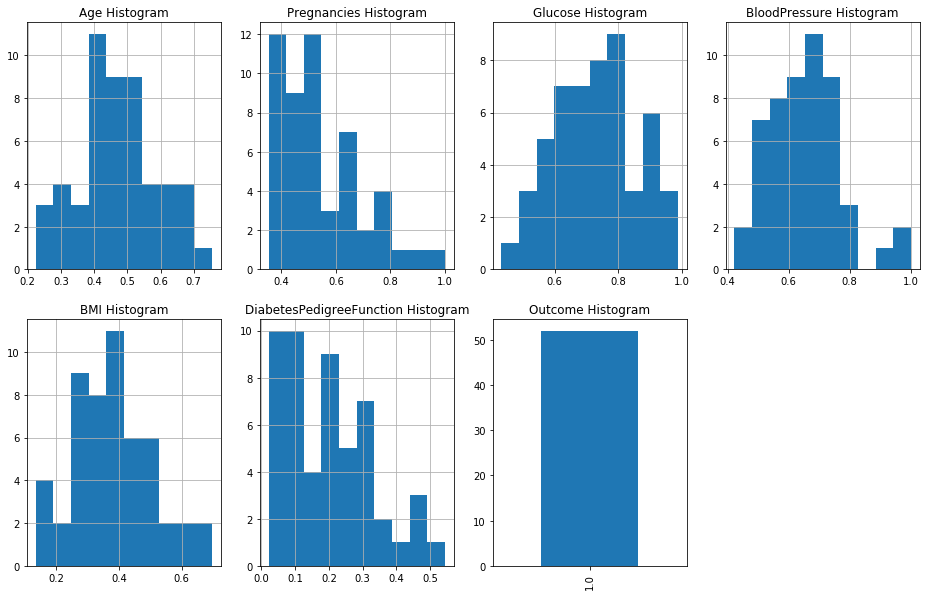

In [99]:
#Cluster9
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster9['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster9['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster9['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster9['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster9['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster9['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster9['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

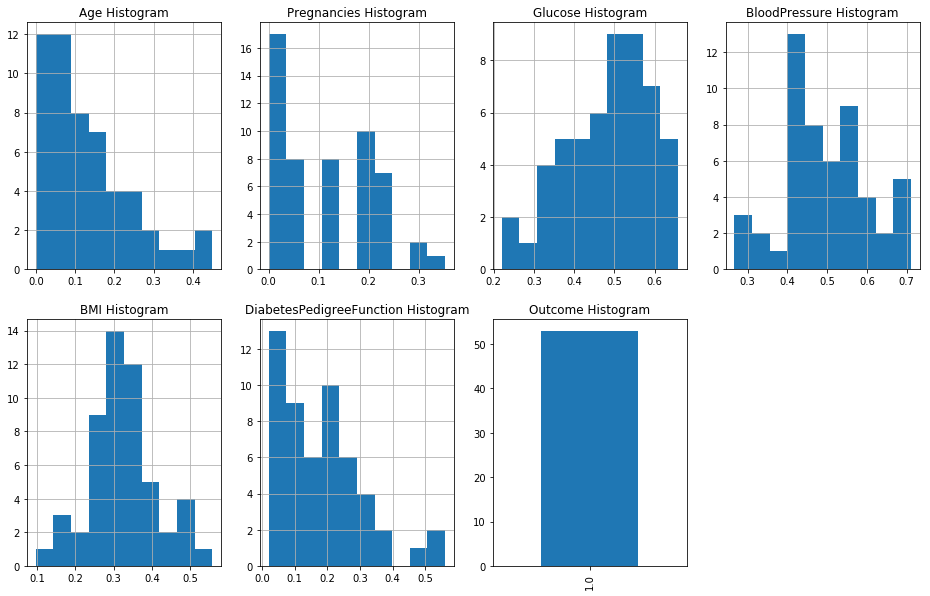

In [100]:
#Cluster10
# Set up a grid of plots
fig = plt.figure(figsize=(16, 10)) 
fig_dims = (2, 4)

# Plot Age counts
plt.subplot2grid(fig_dims, (0, 0))
df_cluster10['Age'].hist()
plt.title('Age Histogram')

# Plot Pregnancies counts
plt.subplot2grid(fig_dims, (0, 1))
df_cluster10['Pregnancies'].hist()
plt.title('Pregnancies Histogram')

# Plot Glucose counts
plt.subplot2grid(fig_dims, (0, 2))
df_cluster10['GlucoseFill'].hist()
plt.title('Glucose Histogram')

# Plot BloodPressure counts
plt.subplot2grid(fig_dims, (0, 3))
df_cluster10['BloodPressureFill'].hist()
plt.title('BloodPressure Histogram')

# Plot BMI counts
plt.subplot2grid(fig_dims, (1, 0))
df_cluster10['BMIFill'].hist()
plt.title('BMI Histogram')

# Plot DiabetesPedigreeFunction counts
plt.subplot2grid(fig_dims, (1, 1))
df_cluster10['DiabetesPedigreeFunction'].hist()
plt.title('DiabetesPedigreeFunction Histogram')

# Plot Outcome counts
plt.subplot2grid(fig_dims, (1, 2))
df_cluster10['Outcome'].value_counts().plot(kind='bar', title='Outcome Counts')
plt.title('Outcome Histogram')

In [101]:
Outcome_xt = pd.crosstab(df_clusters['Outcome'], df_clusters['Labels'])
Outcome_xt

Labels,0,1,2,3,4,5,6,7,8,9,10
Outcome,,,,,,,,,,,
0.0,0,142,0,0,90,78,49,72,0,0,0
1.0,33,0,53,49,0,0,0,0,26,52,53


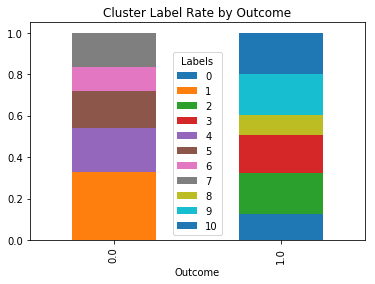

In [102]:
Outcome_xt_pct = Outcome_xt.div(Outcome_xt.sum(1).astype(float), axis=0)
Outcome_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Outcome')
plt.xlabel='Outcome'
plt.ylabel='Cluster Label'

In [103]:
df_clusters.describe()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome,Labels
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,0.156078,0.224665,0.497913,0.533397,0.291404,0.219259,0.381636,4.517934
std,0.122313,0.211486,0.193543,0.127636,0.137501,0.190456,0.486137,3.038552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068745,0.061224,0.354839,0.444444,0.192229,0.058824,0.000000,1.000000
50%,0.121264,0.142857,0.464516,0.533333,0.288344,0.176471,0.000000,4.000000
75%,0.219898,0.367347,0.619355,0.600000,0.374233,0.352941,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [104]:
df_clusters[df_clusters['Labels']==3].describe()

,DiabetesPedigreeFunction,Age,GlucoseFill,BloodPressureFill,BMIFill,Pregnancies,Outcome,Labels
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.0
mean,0.157584,0.202416,0.821330,0.521769,0.330621,0.169268,1.0,3.0
std,0.100542,0.111612,0.092234,0.116500,0.110340,0.122823,0.0,0.0
min,0.004270,0.000000,0.645161,0.288889,0.104294,0.000000,1.0,3.0
25%,0.081127,0.142857,0.741935,0.444444,0.259714,0.058824,1.0,3.0
50%,0.120837,0.183673,0.825806,0.533333,0.321063,0.176471,1.0,3.0
75%,0.217763,0.285714,0.890323,0.577778,0.384458,0.235294,1.0,3.0
max,0.424424,0.428571,0.993548,0.888889,0.615542,0.470588,1.0,3.0


Todo:Characterization of the obtained clusters by using both analysis of the k centroids and comparison of the distribution of variables within the clusters and that in the whole dataset

In [105]:
# density based clustering
print ('dbscan')

dbscan = DBSCAN(eps=0.6, min_samples=5, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan
labels {0: 266, 1: 431, -1: 0}
silhouette 0.578484488776


In [113]:
df_clustersdbscan = df_train
df_clustersdbscan['Labels'] = dbscan.labels_

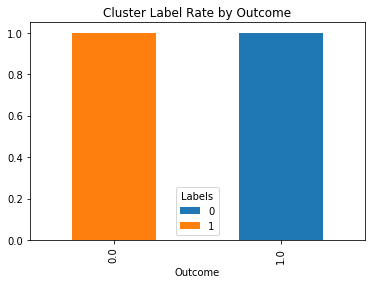

In [115]:
Outcome_xt = pd.crosstab(df_clustersdbscan['Outcome'], df_clustersdbscan['Labels'])
Outcome_xt_pct = Outcome_xt.div(Outcome_xt.sum(1).astype(float), axis=0)
Outcome_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Outcome')
plt.xlabel='Outcome'
plt.ylabel='Cluster Label'

In [106]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=200, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [107]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=11, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

ward


c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\sklearn\cluster\hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


labels {0: 64, 1: 161, 2: 48, 3: 40, 4: 18, 5: 23, 6: 83, 7: 105, 8: 82, 9: 31, 10: 42}
silhouette 0.142751609462


In [108]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=11, linkage='average', affinity='l2',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage


c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\sklearn\cluster\hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


labels {0: 111, 1: 369, 2: 7, 3: 55, 4: 22, 5: 3, 6: 110, 7: 1, 8: 4, 9: 8, 10: 7}
silhouette 0.236855407563


In [121]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=11, linkage='complete', affinity='l2',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))


complete linkage


c:\users\ahmad\appdata\local\programs\python\python35\lib\site-packages\sklearn\cluster\hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


labels {0: 39, 1: 75, 2: 86, 3: 21, 4: 410, 5: 13, 6: 1, 7: 1, 8: 35, 9: 3, 10: 13}
silhouette 0.255366719541


In [122]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

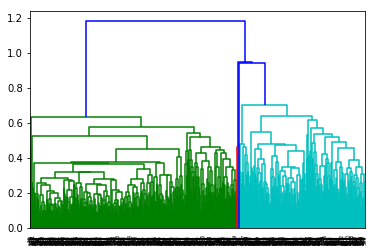

In [126]:
# single linkage and dendogram using scipy
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link)

Todo: Need to add the analysis in the report